In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [25]:
c = 50
N = 5000

prob = c/N
adj = np.random.choice([0,1],p = [1 -prob,prob ],size = (N,N))
adj

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [26]:
adj.sum()/N

49.9206

In [39]:
50**3+3*50**2+50

132550

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<q> = 49.811
%error = 0.37800000000000056
#------------------------#
<q^2> = 2531.6334
%error = 0.7202588235294072
#------------------------#
<q^3> = 131202.4622
%error = 1.0166260279139916
#------------------------#
B = 49.82478568990785
%error = 0.35042862018430654


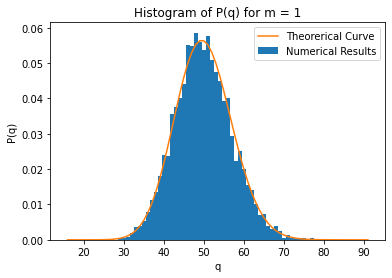

In [40]:
import scipy.special as sp 
def PROB(x,v):
    aux1 = v**x
    aux2 = sp.factorial(x)
    return aux1/aux2*np.exp(-v)

adj = np.random.choice([0,1],p = [1 -prob,prob ],size = (N,N))
adj = np.copy(adj-np.identity(N)*adj.diagonal())

N = 5000
c = 50
minn  = 16
maxx = 91

binada = np.arange(minn-0.5,maxx+1)
Q = np.arange(minn,maxx+1).astype(float)
PROBABILIDADE = np.zeros(len(Q))



q = adj.sum(axis = 0)
plt.hist(q, bins = binada, density = True, label = "Numerical Results")

i = 0
for s in Q: 
    PROBABILIDADE[i] = PROB(s,c)
    i+=1 
    
plt.plot(Q,PROBABILIDADE, label = 'Theorerical Curve')
plt.xlabel('q')
plt.ylabel('P(q)')
plt.title('Histogram of P(q) for m = 1')
plt.legend()
plt.savefig('hist1.eps', format = 'eps')



print("<q> = "+ str(q.mean()))
print("%error = "+ str( 100*np.abs(1-q.mean()/c) ))
print("#------------------------#")
print("<q^2> = " + str((q**2).mean()))
print("%error = "+ str(100* np.abs(1-(q**2).mean()/(c**2+c)) ))
print("#------------------------#")
print("<q^3> = " + str((q**3).mean()))
print("%error = "+ str( 100*np.abs(1-(q**3).mean()/(c**3+3*c**2+c)) ))
print("#------------------------#")
print("B = " + str((q*(q-1)).mean()/q.mean()))
print("%error = "+ str( 100*np.abs(1-((q*(q-1)).mean()/q.mean())/c) ))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<q> = 50.0411
%error = 0.08220000000001004
#------------------------#
<q^2> = 2553.77186
%error = 0.1479160784313649
#------------------------#
<q^3> = 132813.1991
%error = 0.19856589966049665
#------------------------#
B = 50.03348767313268
%error = 0.06697534626536328


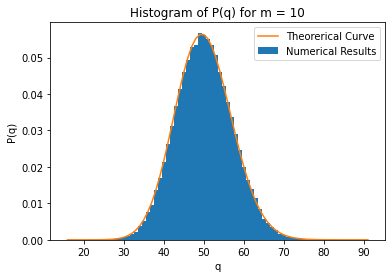

In [41]:
import scipy.special as sp 
def PROB(x,v):
    aux1 = v**x
    aux2 = sp.factorial(x)
    return aux1/aux2*np.exp(-v)

N = 5000
c = 50
m = 10
minn  = 16
maxx = 91
prob = c/N

binada = np.arange(minn-0.5,maxx+1)
Q = np.arange(minn,maxx+1).astype(float)
PROBABILIDADE = np.zeros(len(Q))

q = (np.random.choice([0,1],p = [1 -prob,prob ],size = (N,N))).sum(axis = 0)
for i in range(m-1): 
    pp1 = (np.random.choice([0,1],p = [1 -prob,prob ],size = (N,N))).sum(axis = 0)
    q = np.copy(np.concatenate((q,pp1)))

plt.hist(q, bins = binada, density = True,label= 'Numerical Results')

i = 0
for s in Q: 
    PROBABILIDADE[i] = PROB(s,c)
    i+=1 
    
plt.plot(Q,PROBABILIDADE, label = 'Theorerical Curve')
plt.xlabel('q')
plt.ylabel('P(q)')
plt.title('Histogram of P(q) for m = 10')
plt.legend()
plt.savefig('hist2.eps', format = 'eps')



print("<q> = "+ str(q.mean()))
print("%error = "+ str( 100*np.abs(1-q.mean()/c) ))
print("#------------------------#")
print("<q^2> = " + str((q**2).mean()))
print("%error = "+ str(100* np.abs(1-(q**2).mean()/(c**2+c)) ))
print("#------------------------#")
print("<q^3> = " + str((q**3).mean()))
print("%error = "+ str( 100*np.abs(1-(q**3).mean()/(c**3+3*c**2+c)) ))
print("#------------------------#")
print("B = " + str((q*(q-1)).mean()/q.mean()))
print("%error = "+ str( 100*np.abs(1-((q*(q-1)).mean()/q.mean())/c) ))

In [9]:
adj = np.random.choice([0,1],p = [1 -prob,prob ],size = (N,N))



(array([   0,    0,    0, ..., 4999, 4999, 4999]),
 array([ 120,  149,  293, ..., 4786, 4961, 4998]))

In [44]:
from scipy.sparse import csr_matrix
import numpy as np

N = 5000
c = 50 

A_tri=np.triu(np.random.choice(a=[1,0], size=(N,N), p=[c/(N-1), 1-c/(N-1)]),1)

A = A_tri+np.transpose(A_tri)

Q = np.sum(A, axis=0)

A_sparse = csr_matrix(A)

A_cub = A_sparse.dot(A_sparse.dot(A_sparse))

n_tr = (1/6)*np.sum(A_cub.diagonal())

C = 6*n_tr / (N*(1/N)*np.sum(Q**2)-N*np.mean(Q))


Qiu = (1/N)*np.sum(Q**2) / np.mean(Q)

r = (Q-Qiu)@A@(Q-Qiu)

In [45]:
C

0.009988398213305626

In [46]:
np.abs((1-C*N/c)*100)

0.11601786694375171

In [6]:
c/N

0.01

In [7]:
r

-46540.3334374476

In [8]:
prob = c/N
adj = np.random.choice([0,1],p = [1 -prob,prob ],size = (N,N))
q = adj.sum(axis = 0)

In [12]:
mean = q.mean()
Q = (q**2).mean()/mean
σ = (q**3).mean()/mean-((q**2).mean())**2/mean**2

In [15]:
xx,yy = np.meshgrid(q-Q,q-Q)

In [16]:
xx

array([[ 17.05572346,  -3.94427654,   0.05572346, ...,  -4.94427654,
          6.05572346, -13.94427654],
       [ 17.05572346,  -3.94427654,   0.05572346, ...,  -4.94427654,
          6.05572346, -13.94427654],
       [ 17.05572346,  -3.94427654,   0.05572346, ...,  -4.94427654,
          6.05572346, -13.94427654],
       ...,
       [ 17.05572346,  -3.94427654,   0.05572346, ...,  -4.94427654,
          6.05572346, -13.94427654],
       [ 17.05572346,  -3.94427654,   0.05572346, ...,  -4.94427654,
          6.05572346, -13.94427654],
       [ 17.05572346,  -3.94427654,   0.05572346, ...,  -4.94427654,
          6.05572346, -13.94427654]])

In [17]:
yy

array([[ 17.05572346,  17.05572346,  17.05572346, ...,  17.05572346,
         17.05572346,  17.05572346],
       [ -3.94427654,  -3.94427654,  -3.94427654, ...,  -3.94427654,
         -3.94427654,  -3.94427654],
       [  0.05572346,   0.05572346,   0.05572346, ...,   0.05572346,
          0.05572346,   0.05572346],
       ...,
       [ -4.94427654,  -4.94427654,  -4.94427654, ...,  -4.94427654,
         -4.94427654,  -4.94427654],
       [  6.05572346,   6.05572346,   6.05572346, ...,   6.05572346,
          6.05572346,   6.05572346],
       [-13.94427654, -13.94427654, -13.94427654, ..., -13.94427654,
        -13.94427654, -13.94427654]])

In [22]:
r=(adj*xx*yy).sum()/mean/N/(σ**2)

In [23]:
r

2.2818716776655862e-05

In [3]:
import networkx as net 
import matplotlib.pyplot as plt 

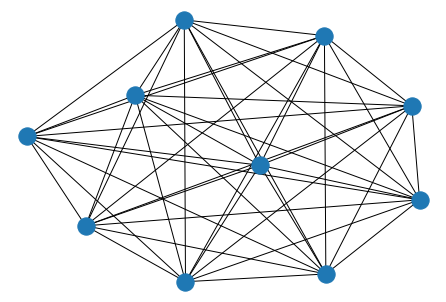

In [8]:
n = 10
c = 50
p = c/n
G = net.erdos_renyi_graph(n, p)
net.draw(G, font_weight='bold')

Text(0.5, 1.0, 'Erdős-Rényi graph w/ B = 10')

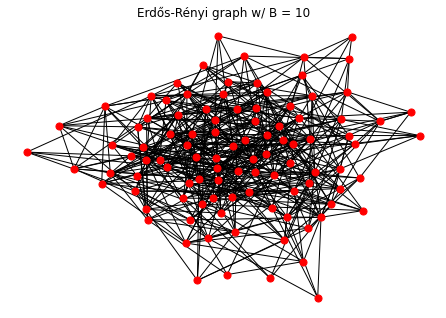

In [22]:
options = {
    'node_color': 'red',
    'node_size': 50,
    'width': 1,
}

n = 100
c = 10
p = c/n
G = net.erdos_renyi_graph(n, p,)
net.draw(G, font_weight='bold',**options)
plt.title('Erdős-Rényi graph w/ B = ' + str(c))

Text(0.5, 1.0, 'Erdős-Rényi graph w/ B = 20')

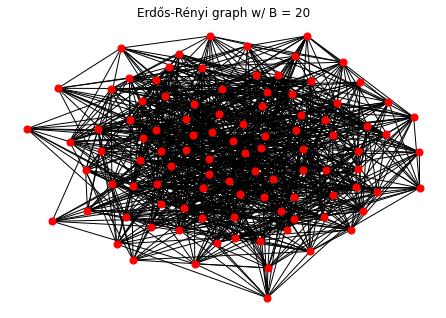

In [23]:
options = {
    'node_color': 'red',
    'node_size': 50,
    'width': 1,
}

n = 100
c = 20
p = c/n
G = net.erdos_renyi_graph(n, p,)
net.draw(G, font_weight='bold',**options)
plt.title('Erdős-Rényi graph w/ B = ' + str(c))

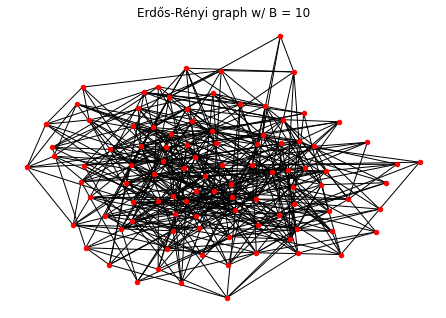

In [32]:
options = {
    'node_color': 'red',
    'node_size': 20,
    'width': 1,
}

n = 100
c = 10
p = c/n
G = net.erdos_renyi_graph(n, p,)
net.draw(G, font_weight='bold',**options)
plt.title('Erdős-Rényi graph w/ B = ' + str(c))
plt.savefig('net' +str(c) + '.eps',format = 'eps')

Text(0.5, 1.0, 'Erdős-Rényi graph w/ B = 6')

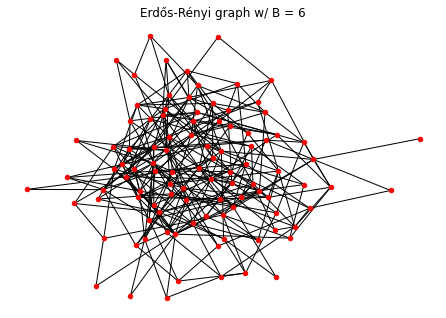

In [82]:
options = {
    'node_color': 'red',
    'node_size': 20,
    'width': 1,
}

n = 100
c = 6
p = c/n
G = net.erdos_renyi_graph(n, p,)
net.draw(G, font_weight='bold',**options)
plt.title('Erdős-Rényi graph w/ B = ' + str(c))
#plt.savefig('net' +str(c) + '.eps',format = 'eps')

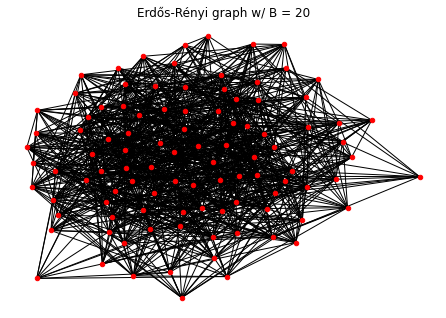

In [34]:
options = {
    'node_color': 'red',
    'node_size': 20,
    'width': 1,
}

n = 100
c = 20
p = c/n
G = net.erdos_renyi_graph(n, p,)
net.draw(G, font_weight='bold',**options)
plt.title('Erdős-Rényi graph w/ B = ' + str(c))
plt.savefig('net' +str(c) + '.eps',format = 'eps')

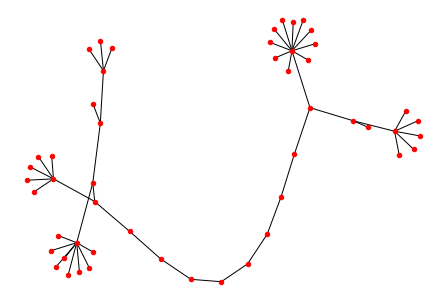

In [117]:
n = 10
p1 = 0.2
p2 = 0.9
G = net.random_lobster(n, p1,p2 )
net.draw(G, **options)

Text(0.5, 1.0, 'Erdős-Rényi graph w/ B = 10')

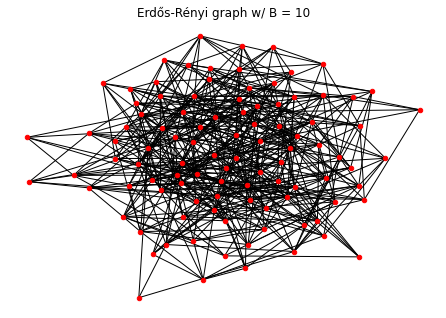

In [119]:
options = {
    'node_color': 'red',
    'node_size': 20,
    'width': 1,
}

n = 100
c = 10
p = c/n
G = net.erdos_renyi_graph(n, p,)
net.draw(G, font_weight='bold',**options)
plt.title('Erdős-Rényi graph w/ B = ' + str(c))
#plt.savefig('net' +str(c) + '.eps',format = 'eps')

Text(0.5, 1.0, 'Erdős-Rényi graph w/ B = 10')

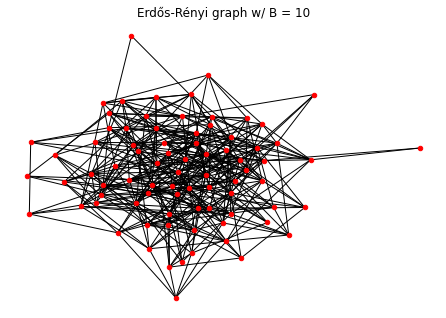

In [120]:
options = {
    'node_color': 'red',
    'node_size': 20,
    'width': 1,
}

n = 80
c = 10
p = c/n
G = net.erdos_renyi_graph(n, p,)
net.draw(G, font_weight='bold',**options)
plt.title('Erdős-Rényi graph w/ B = ' + str(c))
#plt.savefig('net' +str(c) + '.eps',format = 'eps')

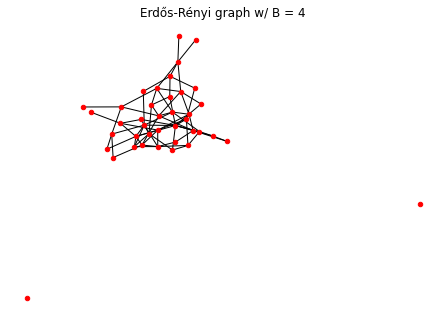

In [136]:
options = {
    'node_color': 'red',
    'node_size': 20,
    'width': 1,
}

n = 40
c = 4
p = c/n
G = net.erdos_renyi_graph(n, p,)
net.draw(G, font_weight='bold',**options)
plt.title('Erdős-Rényi graph w/ B = ' + str(c))
plt.savefig('net' +str(c) + '.eps',format = 'eps')

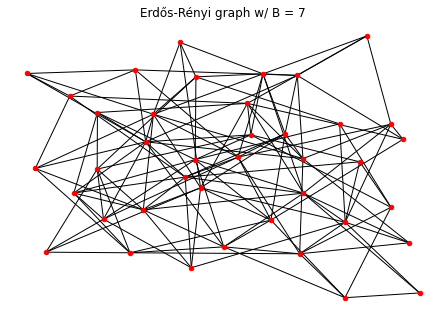

In [137]:
options = {
    'node_color': 'red',
    'node_size': 20,
    'width': 1,
}

n = 40
c = 7
p = c/n
G = net.erdos_renyi_graph(n, p,)
net.draw(G, font_weight='bold',**options)
plt.title('Erdős-Rényi graph w/ B = ' + str(c))
plt.savefig('net' +str(c) + '.eps',format = 'eps')

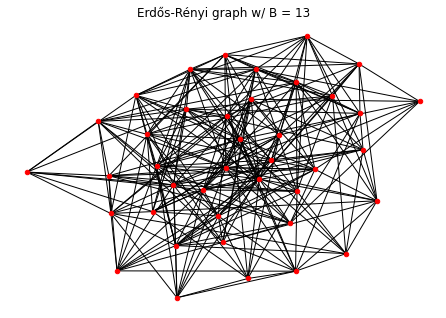

In [138]:
options = {
    'node_color': 'red',
    'node_size': 20,
    'width': 1,
}

n = 40
c = 13
p = c/n
G = net.erdos_renyi_graph(n, p,)
net.draw(G, font_weight='bold',**options)
plt.title('Erdős-Rényi graph w/ B = ' + str(c))
plt.savefig('net' +str(c) + '.eps',format = 'eps')

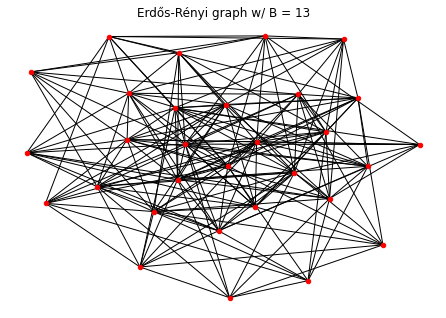

In [153]:
options = {
    'node_color': 'red',
    'node_size': 20,
    'width': 1,
}

n = 30
c = 13
p = c/n


G = net.erdos_renyi_graph(n, p,)

net.draw(G,font_weight='bold',**options)

plt.title('Erdős-Rényi graph w/ B = ' + str(c))
plt.savefig('branch' +str(n) + '.eps',format = 'eps')

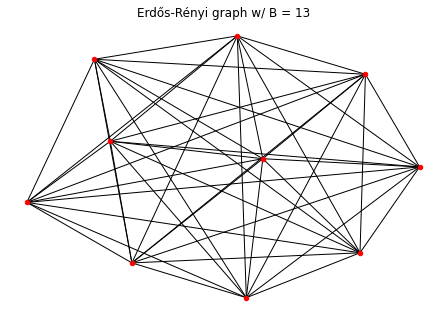

In [154]:
options = {
    'node_color': 'red',
    'node_size': 20,
    'width': 1,
}

n = 10
c = 13
p = c/n


G = net.erdos_renyi_graph(n, p,)

net.draw(G,font_weight='bold',**options)

plt.title('Erdős-Rényi graph w/ B = ' + str(c))
plt.savefig('branch' +str(n) + '.eps',format = 'eps')

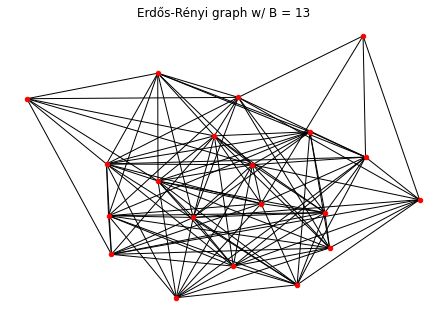

In [156]:
options = {
    'node_color': 'red',
    'node_size': 20,
    'width': 1,
}

n = 20
c = 13
p = c/n


G = net.erdos_renyi_graph(n, p,)

net.draw(G,font_weight='bold',**options)

plt.title('Erdős-Rényi graph w/ B = ' + str(c))
plt.savefig('branch' +str(n) + '.eps',format = 'eps')

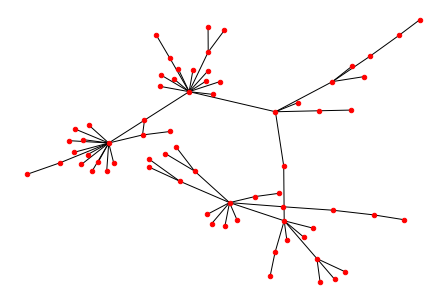

In [171]:
options = {
    'node_color': 'red',
    'node_size': 20,
    'width': 1,
}

n = 70
m = 1

G = net.barabasi_albert_graph(n, m)
net.draw(G,font_weight='bold',**options)
plt.savefig('baba' +str(m) + '.eps',format = 'eps')

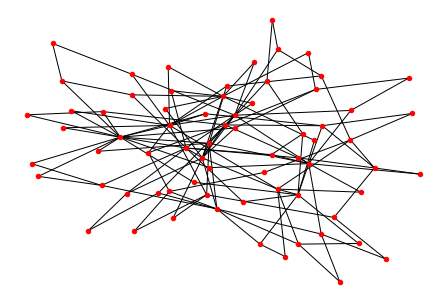

In [172]:
options = {
    'node_color': 'red',
    'node_size': 20,
    'width': 1,
}

n = 70
m = 2

G = net.barabasi_albert_graph(n, m)
net.draw(G,font_weight='bold',**options)
plt.savefig('baba' +str(m) + '.eps',format = 'eps')

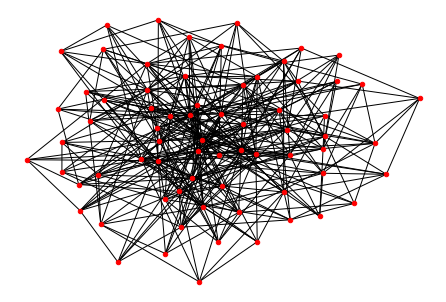

In [174]:
options = {
    'node_color': 'red',
    'node_size': 20,
    'width': 1,
}

n = 70
m = 6

G = net.barabasi_albert_graph(n, m)
net.draw(G,font_weight='bold',**options)
plt.savefig('baba' +str(m) + '.eps',format = 'eps')